In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import csv
from google.colab import files

run_with_seed = 462810009 #np.random.randint(0, 4294967295)
np.random.seed(run_with_seed)

link = "https://docs.google.com/spreadsheets/d/1YN5c7YBmfjmIA4P2Si6PYPDHeJYHeKmV/export" #the /export downloads the file automatically
df = pd.read_excel(link)

In [2]:
def  createConfusionMatrix(confusionMatrix, color):
  group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
  group_counts = ["{0:0.0f}".format(value) for value in confusionMatrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in confusionMatrix.flatten()/np.sum(confusionMatrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  Matrix = sns.heatmap(confusionMatrix, annot = labels, fmt='', cmap = color, linewidth=0.1, linecolor='black' ,xticklabels = ["Not Bankrupt - Healthy", "Bankrupt"], yticklabels = ["Not Bankrupt - Healthy", "Bankrupt"])
  Matrix.set_title('Seaborn Confusion Matrix with labels\n');
  Matrix.set_xlabel('\nPredicted Business Status')
  Matrix.set_ylabel('Actual Business Status ')
  return Matrix

In [3]:
businessdata2006 = df.query("`ΕΤΟΣ` == 2006")
businessdata2007 = df.query("`ΕΤΟΣ` == 2007")
businessdata2008 = df.query("`ΕΤΟΣ` == 2008")
businessdata2009 = df.query("`ΕΤΟΣ` == 2009")

means2006 = businessdata2006.mean(axis = 0)
means2007 = businessdata2007.mean(axis = 0)
means2008 = businessdata2008.mean(axis = 0)
means2009 = businessdata2009.mean(axis = 0)

mins2006 = businessdata2006.min()
mins2007 = businessdata2007.min()
mins2008 = businessdata2008.min()
mins2009 = businessdata2009.min()

maxes2006 = businessdata2006.max()
maxes2007 = businessdata2007.max()
maxes2008 = businessdata2008.max()
maxes2009 = businessdata2009.max()

healthyBusinesses2006 = len(businessdata2006.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 1"))
bankruptBusinesses2006 = len(businessdata2006.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 2"))

healthyBusinesses2007 = len(businessdata2007.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 1"))
bankruptBusinesses2007 = len(businessdata2007.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 2"))

healthyBusinesses2008 = len(businessdata2008.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 1"))
bankruptBusinesses2008 = len(businessdata2008.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 2"))

healthyBusinesses2009 = len(businessdata2009.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 1"))
bankruptBusinesses2009 = len(businessdata2009.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 2"))

print("\nΤο έτος 2006 σημειώθηκαν", healthyBusinesses2006, "υγιείς επιχειρήσεις, ενώ", bankruptBusinesses2006, "επιχειρήσεις κήρυξαν χρεωκοπία.")
print("\nΓια το έτος 2006 η average τιμή κάθε δείκτη είναι: \n")
print(means2006.to_string(dtype = False))
print("\nΓια το έτος 2006 η min τιμή κάθε δείκτη είναι: \n")
print(mins2006.to_string(dtype = False))
print("\nΓια το έτος 2006 η max τιμή κάθε δείκτη είναι: \n")
print(maxes2006.to_string(dtype = False))

print("\nΤο έτος 2007 σημειώθηκαν", healthyBusinesses2007, "υγιείς επιχειρήσεις, ενώ", bankruptBusinesses2007, "επιχειρήσεις κήρυξαν χρεωκοπία.")
print("\nΓια το έτος 2007 η average τιμή κάθε δείκτη είναι: \n")
print(means2007.to_string(dtype = False))
print("\nΓια το έτος 2007 η min τιμή κάθε δείκτη είναι: \n")
print(mins2007.to_string(dtype = False))
print("\nΓια το έτος 2007 η max τιμή κάθε δείκτη είναι: \n")
print(maxes2007.to_string(dtype = False))

print("\nΤο έτος 2008 σημειώθηκαν", healthyBusinesses2008, "υγιείς επιχειρήσεις, ενώ", bankruptBusinesses2008, "επιχειρήσεις κήρυξαν χρεωκοπία.")
print("\nΓια το έτος 2008 η average τιμή κάθε δείκτη είναι: \n")
print(means2008.to_string(dtype = False))
print("\nΓια το έτος 2008 η min τιμή κάθε δείκτη είναι: \n")
print(mins2008.to_string(dtype = False))
print("\nΓια το έτος 2008 η max τιμή κάθε δείκτη είναι: \n")
print(maxes2008.to_string(dtype = False))

print("\nΤο έτος 2009 σημειώθηκαν", healthyBusinesses2009, "υγιείς επιχειρήσεις, ενώ", bankruptBusinesses2009, "επιχειρήσεις κήρυξαν χρεωκοπία.")
print("\nΓια το έτος 2009 η average τιμή κάθε δείκτη είναι: \n")
print(means2009.to_string(dtype = False))
print("\nΓια το έτος 2009 η min τιμή κάθε δείκτη είναι: \n")
print(mins2009.to_string(dtype = False))
print("\nΓια το έτος 2009 η max τιμή κάθε δείκτη είναι: \n")
print(maxes2009.to_string(dtype = False))


Το έτος 2006 σημειώθηκαν 2748 υγιείς επιχειρήσεις, ενώ 52 επιχειρήσεις κήρυξαν χρεωκοπία.

Για το έτος 2006 η average τιμή κάθε δείκτη είναι: 

365* ( Β.Υ / Κοστ.Πωλ )                            427.217852
Λειτ.Αποτ/Συν.Ενεργ. (ROA)                           0.040344
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ                              0.024750
 ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ       1.108668
(ΑΠΑΙΤ.*365) / ΠΩΛ.                                201.425296
Συν.Υποχρ/Συν.Ενεργ                                  0.727140
Διάρκεια Παραμονής Αποθεμάτων                       97.019252
Λογαριθμος Προσωπικού                                0.998572
ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ                                     0.380000
ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ                                    0.723571
ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ                               0.352857
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)                        1.018571
ΕΤΟΣ                                              2006.000000

Για το έτος 2006 η min τιμή κάθε δείκτη είναι: 


In [4]:
trainingSet, testSet = train_test_split(df, test_size=0.2)

print("Συνολικές εταιρείες στο Training Set: ", len(trainingSet))
healthyBusinessesTrainingSet = len(trainingSet.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 1"))
print("Υγιείς εταιρείες στο Training Set: ", healthyBusinessesTrainingSet)
BankruptBusinessesTrainingSet = len(trainingSet.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 2"))
print("Χρεωκοπημένες εταιρείες στο Training Set: ", BankruptBusinessesTrainingSet)

print("Συνολικές εταιρείες στο Test Set: ", len(testSet))
healthyBusinessesTestSet = len(testSet.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 1"))
print("Υγιείς εταιρείες στο Test Set: ", healthyBusinessesTestSet)
BankruptBusinessesTestSet = len(testSet.query("`ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)` == 2"))
print("Χρεωκοπημένες εταιρείες στο Test Set: ", BankruptBusinessesTestSet)

Συνολικές εταιρείες στο Training Set:  8572
Υγιείς εταιρείες στο Training Set:  8369
Χρεωκοπημένες εταιρείες στο Training Set:  203
Συνολικές εταιρείες στο Test Set:  2144
Υγιείς εταιρείες στο Test Set:  2099
Χρεωκοπημένες εταιρείες στο Test Set:  45


In [5]:
scaler = MinMaxScaler()
trainingSet = scaler.fit_transform(trainingSet)
testSet = scaler.transform(testSet)

trainingBusinessStatus = np.take(trainingSet, 11, axis = 1)
testBusinessStatus = np.take(testSet, 11, axis = 1)

trainingSet = np.delete(trainingSet, 11, axis = 1)
testSet = np.delete(testSet, 11, axis = 1)

trainingSet = np.delete(trainingSet, 11, axis = 1)
testSet = np.delete(testSet, 11, axis = 1)

trainingInput = trainingSet
trainingOutput = trainingBusinessStatus
testInput = testSet
testOutput = testBusinessStatus

  
LogR Accuracy Score (Training Set): 0.7779
LogR Accuracy Score (Test Set): 0.7631
  
LogR Precision Score (Training Set): 0.0775
LogR Precision Score (Test Set): 0.0590
  
LogR Recall Score (Training Set): 0.7685
LogR Recall Score (Test Set): 0.6889
  
LogR F1 Score (Training Set): 0.1408
LogR F1 Score (Test Set): 0.1088

LogR Confusion Matrix (Training Set):



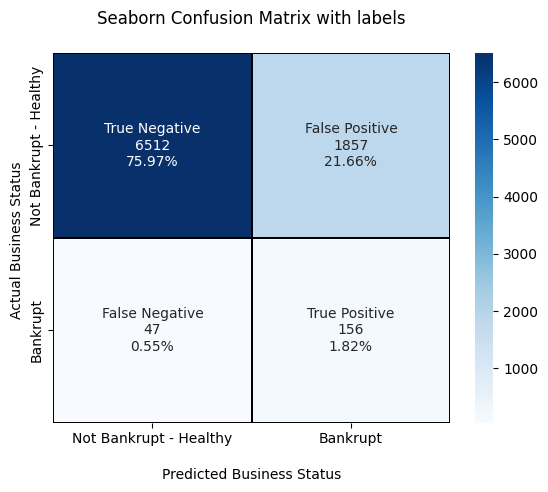


LogR Confusion Matrix (Test Set):



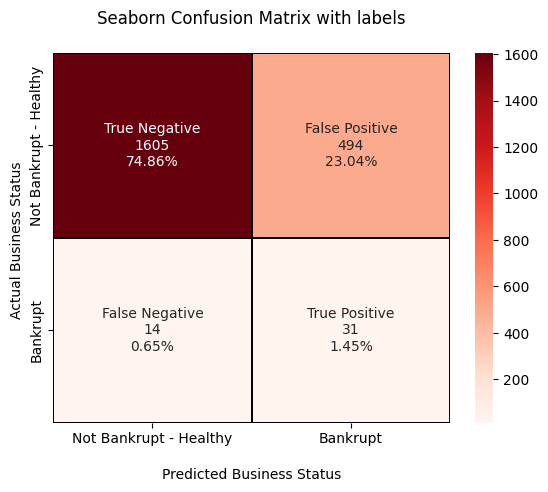

In [6]:
#Logistic Regression Classifier
logRClassifier = LogisticRegression(class_weight = 'balanced')
logRClassifier.fit(trainingInput, trainingOutput)
predictedTrainingLogR = logRClassifier.predict(trainingInput)
predictedTestLogR = logRClassifier.predict(testInput)

confusionMatrixTrainingLogR = confusion_matrix(trainingOutput, predictedTrainingLogR)
confusionMatrixTestLogR = confusion_matrix(testOutput, predictedTestLogR)

accuracyScoreTrainingLogR = accuracy_score(trainingOutput, predictedTrainingLogR)
accuracyScoreTestLogR = accuracy_score(testOutput, predictedTestLogR)

precisionScoreTrainingLogR = precision_score(trainingOutput, predictedTrainingLogR)
precisionScoreTestLogR = precision_score(testOutput, predictedTestLogR)

recallScoreTrainingLogR = recall_score(trainingOutput, predictedTrainingLogR)
recallScoreTestLogR = recall_score(testOutput, predictedTestLogR)

f1ScoreTrainingLogR = f1_score(trainingOutput, predictedTrainingLogR)
f1ScoreTestLogR = f1_score(testOutput, predictedTestLogR)

print("  \nLogR Accuracy Score (Training Set): {:.4f}".format(accuracyScoreTrainingLogR))
print("LogR Accuracy Score (Test Set): {:.4f}".format(accuracyScoreTestLogR))

print("  \nLogR Precision Score (Training Set): {:.4f}".format(precisionScoreTrainingLogR))
print("LogR Precision Score (Test Set): {:.4f}".format(precisionScoreTestLogR))

print("  \nLogR Recall Score (Training Set): {:.4f}".format(recallScoreTrainingLogR))
print("LogR Recall Score (Test Set): {:.4f}".format(recallScoreTestLogR))

print("  \nLogR F1 Score (Training Set): {:.4f}".format(f1ScoreTrainingLogR))
print("LogR F1 Score (Test Set): {:.4f}".format(f1ScoreTestLogR))

print("\nLogR Confusion Matrix (Training Set):\n")
seabornMatrixTrainingLogR = createConfusionMatrix(confusionMatrixTrainingLogR, "Blues")
plt.show()

seabornMatrixTestLogR = createConfusionMatrix(confusionMatrixTestLogR, "Reds")
print("\nLogR Confusion Matrix (Test Set):\n")
plt.show()

  
kNN Accuracy Score (Training Set): 0.9782
kNN Accuracy Score (Test Set): 0.9771
  
kNN Precision Score (Training Set): 0.7667
kNN Precision Score (Test Set): 0.2500
  
kNN Recall Score (Training Set): 0.1133
kNN Recall Score (Test Set): 0.0444
  
kNN F1 Score (Training Set): 0.1974
kNN F1 Score (Test Set): 0.0755

kNN Confusion Matrix (Training Set):



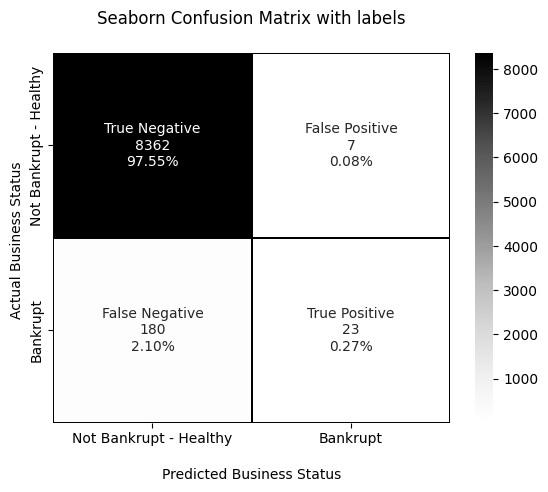


kNN Confusion Matrix (Test Set):



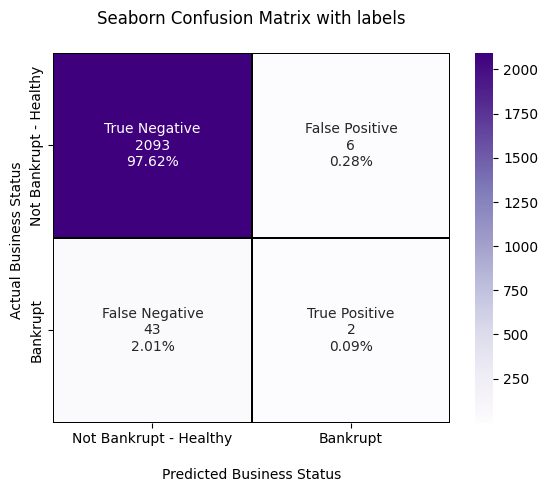

In [7]:
#kNN Classifier
knnClassifier = KNeighborsClassifier(n_neighbors = 5)
knnClassifier.fit(trainingInput, trainingOutput)
predictedTrainingkNN = knnClassifier.predict(trainingInput)
predictedTestkNN = knnClassifier.predict(testInput)

confusionMatrixTrainingkNN = confusion_matrix(trainingOutput, predictedTrainingkNN)
confusionMatrixTestkNN = confusion_matrix(testOutput, predictedTestkNN)

accuracyScoreTrainingkNN = accuracy_score(trainingOutput, predictedTrainingkNN)
accuracyScoreTestkNN = accuracy_score(testOutput, predictedTestkNN)

precisionScoreTrainingkNN = precision_score(trainingOutput, predictedTrainingkNN)
precisionScoreTestkNN = precision_score(testOutput, predictedTestkNN)

recallScoreTrainingkNN = recall_score(trainingOutput, predictedTrainingkNN)
recallScoreTestkNN = recall_score(testOutput, predictedTestkNN)

f1ScoreTrainingkNN = f1_score(trainingOutput, predictedTrainingkNN)
f1ScoreTestkNN = f1_score(testOutput, predictedTestkNN)

print("  \nkNN Accuracy Score (Training Set): {:.4f}".format(accuracyScoreTrainingkNN))
print("kNN Accuracy Score (Test Set): {:.4f}".format(accuracyScoreTestkNN))

print("  \nkNN Precision Score (Training Set): {:.4f}".format(precisionScoreTrainingkNN))
print("kNN Precision Score (Test Set): {:.4f}".format(precisionScoreTestkNN))

print("  \nkNN Recall Score (Training Set): {:.4f}".format(recallScoreTrainingkNN))
print("kNN Recall Score (Test Set): {:.4f}".format(recallScoreTestkNN))

print("  \nkNN F1 Score (Training Set): {:.4f}".format(f1ScoreTrainingkNN))
print("kNN F1 Score (Test Set): {:.4f}".format(f1ScoreTestkNN))

print("\nkNN Confusion Matrix (Training Set):\n")
seabornMatrixTrainingkNN = createConfusionMatrix(confusionMatrixTrainingkNN, "Greys")
plt.show()

seabornMatrixTestkNN = createConfusionMatrix(confusionMatrixTestkNN, "Purples")
print("\nkNN Confusion Matrix (Test Set):\n")
plt.show()

  
Bayes Accuracy Score (Training Set): 0.9276
Bayes Accuracy Score (Test Set): 0.9207
  
Bayes Precision Score (Training Set): 0.0965
Bayes Precision Score (Test Set): 0.0805
  
Bayes Recall Score (Training Set): 0.2463
Bayes Recall Score (Test Set): 0.2667
  
Bayes F1 Score (Training Set): 0.1387
Bayes F1 Score (Test Set): 0.1237

Bayes Confusion Matrix (Training Set):



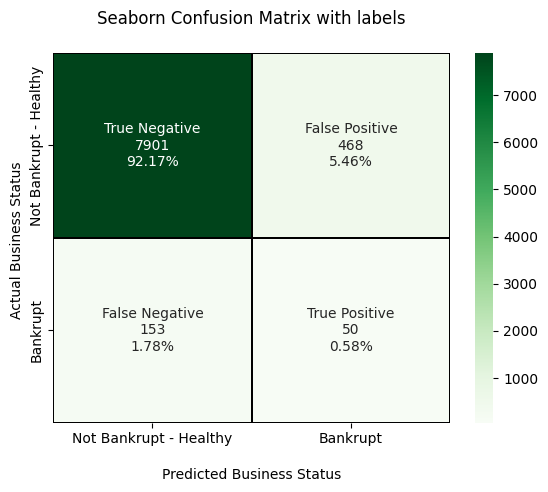


Bayes Confusion Matrix (Test Set):



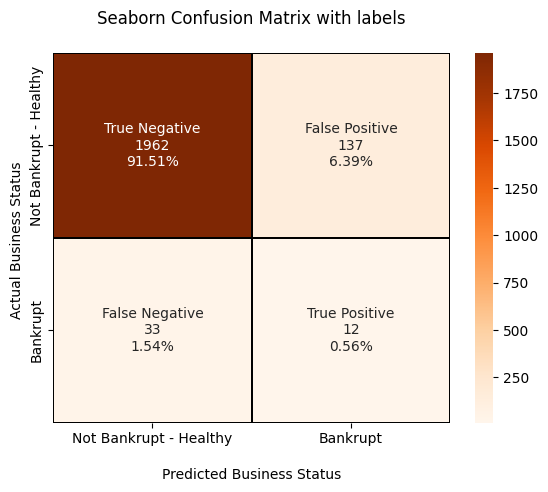

In [8]:
#Gaussian Naive Bayes Classifier
bayesClassifier = GaussianNB()
bayesClassifier = bayesClassifier.fit(trainingInput, trainingOutput)
predictedTrainingBayes = bayesClassifier.predict(trainingInput)
predictedTestSVCBayes = bayesClassifier.predict(testInput)

confusionMatrixTrainingBayes = confusion_matrix(trainingOutput, predictedTrainingBayes)
confusionMatrixTestBayes = confusion_matrix(testOutput, predictedTestSVCBayes)

accuracyScoreTrainingBayes = accuracy_score(trainingOutput, predictedTrainingBayes)
accuracyScoreTestBayes = accuracy_score(testOutput, predictedTestSVCBayes)

precisionScoreTrainingBayes = precision_score(trainingOutput, predictedTrainingBayes)
precisionScoreTestBayes = precision_score(testOutput, predictedTestSVCBayes)

recallScoreTrainingBayes = recall_score(trainingOutput, predictedTrainingBayes)
recallScoreTestBayes = recall_score(testOutput, predictedTestSVCBayes)

f1ScoreTrainingBayes = f1_score(trainingOutput, predictedTrainingBayes)
f1ScoreTestBayes = f1_score(testOutput, predictedTestSVCBayes)

print("  \nBayes Accuracy Score (Training Set): {:.4f}".format(accuracyScoreTrainingBayes))
print("Bayes Accuracy Score (Test Set): {:.4f}".format(accuracyScoreTestBayes))

print("  \nBayes Precision Score (Training Set): {:.4f}".format(precisionScoreTrainingBayes))
print("Bayes Precision Score (Test Set): {:.4f}".format(precisionScoreTestBayes))

print("  \nBayes Recall Score (Training Set): {:.4f}".format(recallScoreTrainingBayes))
print("Bayes Recall Score (Test Set): {:.4f}".format(recallScoreTestBayes))

print("  \nBayes F1 Score (Training Set): {:.4f}".format(f1ScoreTrainingBayes))
print("Bayes F1 Score (Test Set): {:.4f}".format(f1ScoreTestBayes))

print("\nBayes Confusion Matrix (Training Set):\n")
seabornMatrixTrainingBayes = createConfusionMatrix(confusionMatrixTrainingBayes, "Greens")
plt.show()

seabornMatrixTestBayes = createConfusionMatrix(confusionMatrixTestBayes, "Oranges")
print("\nBayes Confusion Matrix (Test Set):\n")
plt.show()

  
SVC Accuracy Score (Training Set): 0.8062
SVC Accuracy Score (Test Set): 0.7943
  
SVC Precision Score (Training Set): 0.0972
SVC Precision Score (Test Set): 0.0677
  
SVC Recall Score (Training Set): 0.8670
SVC Recall Score (Test Set): 0.6889
  
SVC F1 Score (Training Set): 0.1749
SVC F1 Score (Test Set): 0.1233

SVC Confusion Matrix (Training Set):



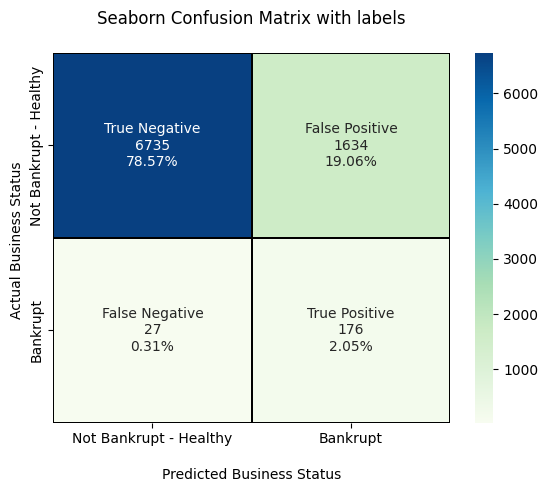


SVC Confusion Matrix (Test Set):



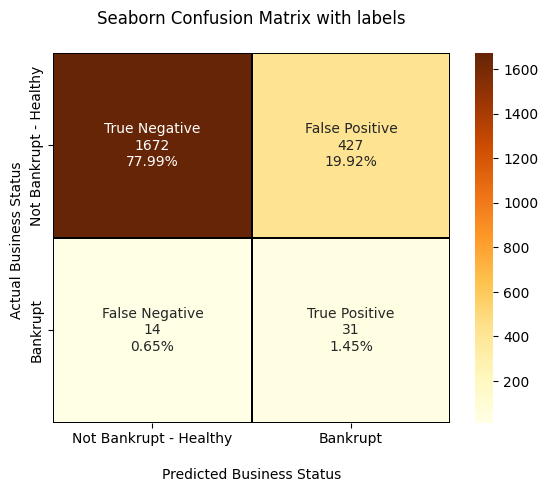

In [9]:
#Support Vector Classifier
SVClassifier = svm.SVC(class_weight = 'balanced')
SVClassifier.fit(trainingInput, trainingOutput)

predictedTrainingSVC = SVClassifier.predict(trainingInput)
predictedTestSVC = SVClassifier.predict(testInput)

confusionMatrixTrainingSVC = confusion_matrix(trainingOutput, predictedTrainingSVC)
confusionMatrixTestSVC = confusion_matrix(testOutput, predictedTestSVC)

accuracyScoreTrainingSVC = accuracy_score(trainingOutput, predictedTrainingSVC)
accuracyScoreTestSVC = accuracy_score(testOutput, predictedTestSVC)

precisionScoreTrainingSVC = precision_score(trainingOutput, predictedTrainingSVC)
precisionScoreTestSVC = precision_score(testOutput, predictedTestSVC)

recallScoreTrainingSVC = recall_score(trainingOutput, predictedTrainingSVC)
recallScoreTestSVC = recall_score(testOutput, predictedTestSVC)

f1ScoreTrainingSVC = f1_score(trainingOutput, predictedTrainingSVC)
f1ScoreTestSVC = f1_score(testOutput, predictedTestSVC)

print("  \nSVC Accuracy Score (Training Set): {:.4f}".format(accuracyScoreTrainingSVC))
print("SVC Accuracy Score (Test Set): {:.4f}".format(accuracyScoreTestSVC))

print("  \nSVC Precision Score (Training Set): {:.4f}".format(precisionScoreTrainingSVC))
print("SVC Precision Score (Test Set): {:.4f}".format(precisionScoreTestSVC))

print("  \nSVC Recall Score (Training Set): {:.4f}".format(recallScoreTrainingSVC))
print("SVC Recall Score (Test Set): {:.4f}".format(recallScoreTestSVC))

print("  \nSVC F1 Score (Training Set): {:.4f}".format(f1ScoreTrainingSVC))
print("SVC F1 Score (Test Set): {:.4f}".format(f1ScoreTestSVC))

print("\nSVC Confusion Matrix (Training Set):\n")
seabornMatrixTrainingSVC = createConfusionMatrix(confusionMatrixTrainingSVC, "GnBu")
plt.show()

seabornMatrixTestSVC = createConfusionMatrix(confusionMatrixTestSVC, "YlOrBr")
print("\nSVC Confusion Matrix (Test Set):\n")
plt.show()

In [10]:
labels = ['Classifier Name', 'Training or Test Set', 'Number of Training Samples', 'Number of non-healthy \
companies in training sample', 'TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'F1 score', 'Accuracy']
myData = [
    ['Logistic Regression Classifier', 'Training Set', len(trainingInput), BankruptBusinessesTrainingSet, confusionMatrixTrainingLogR[1, 1], confusionMatrixTrainingLogR[0, 0], confusionMatrixTrainingLogR[0, 1], confusionMatrixTrainingLogR[1, 0], precisionScoreTrainingLogR, recallScoreTrainingLogR, f1ScoreTrainingLogR, accuracyScoreTrainingLogR],
    ['Logistic Regression Classifier', 'Test Set', len(testInput), BankruptBusinessesTestSet, confusionMatrixTestLogR[1, 1], confusionMatrixTestLogR[0, 0], confusionMatrixTestLogR[0, 1], confusionMatrixTestLogR[1, 0], precisionScoreTestLogR, recallScoreTestLogR, f1ScoreTestLogR, accuracyScoreTestLogR],
    ['kNN Classifier', 'Training Set', len(trainingInput), BankruptBusinessesTrainingSet, confusionMatrixTrainingkNN[1, 1], confusionMatrixTrainingkNN[0, 0], confusionMatrixTrainingkNN[0, 1], confusionMatrixTrainingkNN[1, 0], precisionScoreTrainingkNN, recallScoreTrainingkNN, f1ScoreTrainingkNN, accuracyScoreTrainingkNN],
    ['kNN Classifier', 'Test Set', len(testInput), BankruptBusinessesTestSet, confusionMatrixTestkNN[1, 1], confusionMatrixTestkNN[0, 0], confusionMatrixTestkNN[0, 1], confusionMatrixTestkNN[1, 0], precisionScoreTestkNN, recallScoreTestkNN, f1ScoreTestkNN, accuracyScoreTestkNN],
    ['Gaussian Naive Bayes Classifier', 'Training Set', len(trainingInput), BankruptBusinessesTrainingSet, confusionMatrixTrainingBayes[1, 1], confusionMatrixTrainingBayes[0, 0], confusionMatrixTrainingBayes[0, 1], confusionMatrixTrainingBayes[1, 0], precisionScoreTrainingBayes, recallScoreTrainingBayes, f1ScoreTrainingBayes, accuracyScoreTrainingBayes],
    ['Gaussian Naive Bayes Classifier', 'Test Set', len(testInput), BankruptBusinessesTestSet, confusionMatrixTestBayes[1, 1], confusionMatrixTestBayes[0, 0], confusionMatrixTestBayes[0, 1], confusionMatrixTestBayes[1, 0], precisionScoreTestBayes, recallScoreTestBayes, f1ScoreTestBayes, accuracyScoreTestBayes],
    ['Support Vector Classifier', 'Training Set', len(trainingInput), BankruptBusinessesTrainingSet, confusionMatrixTrainingSVC[1, 1], confusionMatrixTrainingSVC[0, 0], confusionMatrixTrainingSVC[0, 1], confusionMatrixTrainingSVC[1, 0], precisionScoreTrainingSVC, recallScoreTrainingSVC, f1ScoreTrainingSVC, accuracyScoreTrainingSVC],
    ['Support Vector Classifier', 'Test Set', len(testInput), BankruptBusinessesTestSet, confusionMatrixTestSVC[1, 1], confusionMatrixTestSVC[0, 0], confusionMatrixTestSVC[0, 1], confusionMatrixTestSVC[1, 0], precisionScoreTestSVC, recallScoreTestSVC, f1ScoreTestSVC, accuracyScoreTestSVC]
]

with open('Model Results.csv', 'w', encoding='UTF8', newline='') as x:
    writer = csv.writer(x)
    writer.writerow(labels)
    writer.writerows(myData)

files.download('Model Results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>